In [85]:
import os
print(os.getcwd())


c:\Users\perug\OneDrive\Desktop\Placement Project\notebooks


In [86]:
import pandas as pd

df = pd.read_csv("../data/students_data.csv")
df.head()


,gender,tenth_percentage,inter_percentage,ug_percentage,ug_department,internships,aptitude_score,verbal_score,reasoning_score,outcome
0,Male,78.42,87.62,68.16,ECE,1.0,48.60,66.26,53.42,Not Placed
1,Female,93.76,90.74,62.61,MECH,2.0,72.47,69.32,51.92,Not Placed
2,Male,84.50,72.38,77.12,EEE,1.0,74.69,57.60,74.37,Placed
3,Male,69.23,62.96,78.28,EEE,1.0,45.88,73.90,39.32,Not Placed
4,Male,66.02,77.52,55.23,EEE,3.0,55.73,51.87,83.32,Not Placed


In [87]:
df.shape


(1000, 10)

In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            950 non-null    object 
 1   tenth_percentage  950 non-null    float64
 2   inter_percentage  950 non-null    float64
 3   ug_percentage     950 non-null    float64
 4   ug_department     950 non-null    object 
 5   internships       950 non-null    float64
 6   aptitude_score    950 non-null    float64
 7   verbal_score      950 non-null    float64
 8   reasoning_score   950 non-null    float64
 9   outcome           1000 non-null   object 
dtypes: float64(7), object(3)
memory usage: 78.3+ KB


In [89]:
df.describe()


,tenth_percentage,inter_percentage,ug_percentage,internships,aptitude_score,verbal_score,reasoning_score
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,75.312326,72.416316,70.014442,1.509474,64.638505,60.287758,62.241747
std,9.976545,11.887040,8.116667,1.122345,15.018033,13.921895,13.091315
min,46.040000,35.770000,46.070000,0.000000,9.370000,17.100000,25.410000
25%,68.752500,64.592500,64.320000,1.000000,54.285000,50.517500,53.502500
50%,75.275000,72.250000,69.965000,1.000000,64.995000,60.405000,62.235000
75%,81.672500,80.157500,75.457500,3.000000,74.740000,69.702500,71.300000
max,101.320000,110.320000,101.410000,3.000000,107.610000,110.390000,108.220000


In [30]:
X = df.drop("outcome", axis=1)
y = df["outcome"]


In [106]:
df.isnull().sum()


gender                 0
tenth_percentage      50
inter_percentage      50
ug_percentage         50
ug_department          0
internships           50
aptitude_score        50
verbal_score          50
reasoning_score       50
outcome                0
overall_skill        140
academic_strength    139
dtype: int64

In [107]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Fill numeric NaNs with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical NaNs with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [108]:
df.isnull().sum()


gender               0
tenth_percentage     0
inter_percentage     0
ug_percentage        0
ug_department        0
internships          0
aptitude_score       0
verbal_score         0
reasoning_score      0
outcome              0
overall_skill        0
academic_strength    0
dtype: int64

In [109]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [110]:
df.fillna(df.mode().iloc[0], inplace=True)


In [111]:
df = df.drop_duplicates()


In [112]:
df.dtypes


gender                 int64
tenth_percentage     float64
inter_percentage     float64
ug_percentage        float64
ug_department          int64
internships          float64
aptitude_score       float64
verbal_score         float64
reasoning_score      float64
outcome                int64
overall_skill        float64
academic_strength    float64
dtype: object

In [113]:
categorical_cols = ["gender", "ug_department", "outcome"]


In [114]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [115]:
X = df.drop("outcome", axis=1)
y = df["outcome"]


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [118]:
y.value_counts()


outcome
0    698
1    302
Name: count, dtype: int64

In [162]:
df["aptitude_strength"] = (
    df["aptitude_score"] +
    df["verbal_score"] +
    df["reasoning_score"]
) / 3


In [120]:
df["academic_strength"] = (
    df["tenth_percentage"] * 0.2 +
    df["inter_percentage"] * 0.3 +
    df["ug_percentage"] * 0.5
)


In [121]:
df.head()


,gender,tenth_percentage,inter_percentage,ug_percentage,ug_department,internships,aptitude_score,verbal_score,reasoning_score,outcome,overall_skill,academic_strength
0,1,78.42,87.62,68.16,2,1.0,48.60,66.26,53.42,0,56.093333,76.050
1,0,93.76,90.74,62.61,5,2.0,72.47,69.32,51.92,0,64.570000,77.279
2,1,84.50,72.38,77.12,3,1.0,74.69,57.60,74.37,1,68.886667,77.174
3,1,69.23,62.96,78.28,3,1.0,45.88,73.90,39.32,0,53.033333,71.874
4,1,66.02,77.52,55.23,3,3.0,55.73,51.87,83.32,0,63.640000,64.075


In [122]:
X = df.drop("outcome", axis=1)
y = df["outcome"]


In [45]:
X = df.drop("outcome", axis=1)
y = df["outcome"]


In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [125]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled,
    y_train
)


In [126]:
import pandas as pd
pd.Series(y_train_smote).value_counts()


outcome
0    558
1    558
Name: count, dtype: int64

In [127]:
from sklearn.svm import SVC


In [128]:
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_smote, y_train_smote)


SVC(random_state=42)

In [129]:
y_pred_svm = svm_model.predict(X_test_scaled)


In [130]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)
cm


array([[123,  17],
       [  9,  51]])

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.93      0.88      0.90       140
           1       0.75      0.85      0.80        60

    accuracy                           0.87       200
   macro avg       0.84      0.86      0.85       200
weighted avg       0.88      0.87      0.87       200



In [132]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_svm)


0.87

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["rbf"]
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='recall')

In [134]:
best_svm = grid.best_estimator_
best_svm


SVC(C=10, gamma=0.1)

In [135]:
y_pred_best_svm = best_svm.predict(X_test_scaled)


In [136]:
print(classification_report(y_test, y_pred_best_svm))


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       140
           1       0.74      0.85      0.79        60

    accuracy                           0.86       200
   macro avg       0.84      0.86      0.85       200
weighted avg       0.87      0.86      0.87       200



In [137]:
class_weight="balanced"


In [138]:
from sklearn.ensemble import RandomForestClassifier


In [139]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [140]:
y_pred_rf = rf_model.predict(X_test)


In [141]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)


array([[135,   5],
       [  7,  53]])

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       140
           1       0.91      0.88      0.90        60

    accuracy                           0.94       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.94      0.94      0.94       200



In [143]:
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
6,aptitude_score,0.304864
3,ug_percentage,0.233471
5,internships,0.192969
10,academic_strength,0.067155
9,overall_skill,0.050340
2,inter_percentage,0.038036
8,reasoning_score,0.034023
7,verbal_score,0.033591
1,tenth_percentage,0.028254
4,ug_department,0.011687


In [144]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        class_weight="balanced"
    ),
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [145]:
best_rf = grid_rf.best_estimator_
best_rf


RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=200, random_state=42)

In [147]:
y_pred_best_rf = best_rf.predict(X_test)


In [148]:
print(classification_report(y_test, y_pred_best_rf))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       140
           1       0.92      0.93      0.93        60

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



In [149]:
best_svm
y_pred_best_svm

best_rf
y_pred_best_rf

y_test


589    0
874    0
398    0
807    0
753    0
      ..
846    0
748    0
71     0
314    1
18     0
Name: outcome, Length: 200, dtype: int64

In [156]:
import pandas as pd

feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


aptitude_score       0.320033
ug_percentage        0.232174
internships          0.200514
academic_strength    0.066250
overall_skill        0.049158
inter_percentage     0.031074
verbal_score         0.029771
reasoning_score      0.029716
tenth_percentage     0.027457
ug_department        0.010053
gender               0.003801
dtype: float64

In [157]:
import joblib

joblib.dump(best_rf, "../models/random_forest_model.pkl")


['../models/random_forest_model.pkl']

In [150]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_best_svm)
cm_svm


array([[122,  18],
       [  9,  51]])

In [151]:
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
cm_rf


array([[135,   5],
       [  4,  56]])

In [152]:
from sklearn.metrics import classification_report

print("SVM Report")
print(classification_report(y_test, y_pred_best_svm))


SVM Report
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       140
           1       0.74      0.85      0.79        60

    accuracy                           0.86       200
   macro avg       0.84      0.86      0.85       200
weighted avg       0.87      0.86      0.87       200



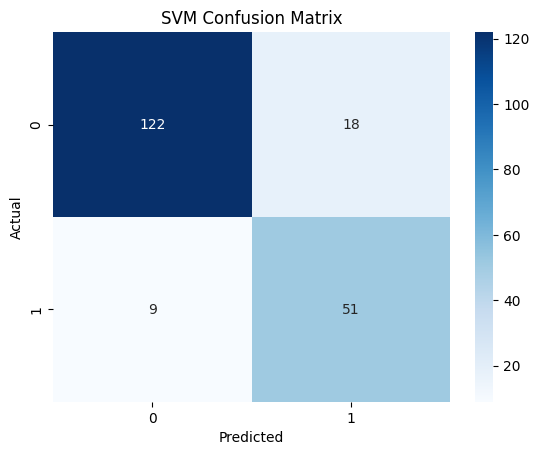

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [153]:
print("Random Forest Report")
print(classification_report(y_test, y_pred_best_rf))


Random Forest Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       140
           1       0.92      0.93      0.93        60

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



In [154]:
import joblib

joblib.dump(best_svm, "../models/svm_model.pkl")


['../models/svm_model.pkl']

In [159]:
from sklearn.model_selection import cross_val_score

svm_cv_scores = cross_val_score(
    best_svm,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="f1"
)

svm_cv_scores


array([0.77083333, 0.75510204, 0.64285714, 0.69473684, 0.74747475])

In [160]:
svm_cv_scores.mean(), svm_cv_scores.std()


(np.float64(0.7222008213173626), np.float64(0.0471933730065416))

In [161]:
rf_cv_scores = cross_val_score(
    best_rf,
    X_train,
    y_train,
    cv=5,
    scoring="f1"
)

rf_cv_scores.mean(), rf_cv_scores.std()


(np.float64(0.8841166380789023), np.float64(0.023596872061729363))